In [1]:
import simulation
import utils
import HminLower
import shannonLower
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import json
import ShannonEAT

## Recreating results on Shannon

In [2]:
alphas = np.linspace(0.07, 1, 50)
betas = np.linspace(0.3, 0.9, 50)
vals = np.zeros((50, 50))
res = {'alphas': alphas, 'betas': betas, 'probas': []}

for i in range(50):
    for j in range(50):
        a = (alphas[i], betas[j])
        deltas, p = simulation.doSimul(a, 1/2, '3', 100000, 0.94)
        val = shannonLower.runOpti(deltas, p[0], 1/2, 'Faster', impl=1)
        vals[i,j] = val
        res['probas'].append(p)

res['vals'] = vals
with open("Results/Shannon3.json", 'w') as f:
    json.dump(res, f)

KeyboardInterrupt: 

In [ ]:
xticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
import seaborn as sns

plt.figure()
ax = sns.heatmap(vals, xticklabels=xticks, yticklabels=yticks, cmap='viridis')
ax.invert_yaxis()
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Heatmap of f(alpha, beta)')

## Comparing Shannon and Hmin -- Same setup as from paper

In [2]:
res1 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, False)
    val = shannonLower.runOpti(delta, p[0], 7/8)

    res1['deltas'].append(delta)
    res1['vals'].append(val)
    res1['probas'].append(p)

with open('Results/Shannon1_077_NoDT.json', 'w') as f:
    json.dump(res1, f)

In [3]:
res2 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, True)
    val = shannonLower.runOpti(delta, p[0], 7/8)

    res2['deltas'].append(delta)
    res2['vals'].append(val)
    res2['probas'].append(p)

with open('Results/Shannon1_077_DT.json', 'w') as f:
    json.dump(res2, f)

In [4]:
res3 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, False)
    val = HminLower.getHmin(p[0], delta, 7/8)

    res3['deltas'].append(delta)
    res3['vals'].append(val)
    res3['probas'].append(p)

with open('Results/Hmin1_077_NoDT.json', 'w') as f:
    json.dump(res3, f)

In [5]:
res4 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, True)
    val = HminLower.getHmin(p[0], delta, 7/8)

    res4['deltas'].append(delta)
    res4['vals'].append(val)
    res4['probas'].append(p)

with open('Results/Hmin1_077_DT.json', 'w') as f:
    json.dump(res4, f)

In [6]:
res5 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 1, False)
    p = utils.handle_non_phys(p, alpha, '1')
    val = shannonLower.runOpti(delta, p[0], 7/8)

    res5['deltas'].append(delta)
    res5['vals'].append(val)
    res5['probas'].append(p)

with open('Results/Shannon1_1_NoDT.json', 'w') as f:
    json.dump(res5, f)

In [7]:
res6 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 1, False)
    p = utils.handle_non_phys(p, alpha, '1')
    val = HminLower.getHmin(p[0], delta, 7/8)

    res6['deltas'].append(delta)
    res6['vals'].append(val)
    res6['probas'].append(p)

with open('Results/Hmin1_1_NoDT.json', 'w') as f:
    json.dump(res6, f)

In [8]:
alphas = [sqrt(alpha) for alpha in alphas]

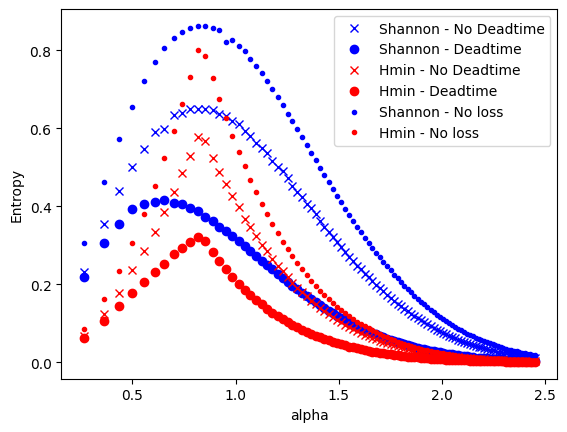

In [9]:
plt.figure()
plt.plot(alphas, res1['vals'], 'bx', label="Shannon - No Deadtime")
plt.plot(alphas, res2['vals'], 'bo', label="Shannon - Deadtime")
plt.plot(alphas, res3['vals'], 'rx', label="Hmin - No Deadtime")
plt.plot(alphas, res4['vals'], 'ro', label="Hmin - Deadtime")
plt.plot(alphas, res5['vals'], 'b.', label="Shannon - No loss")
plt.plot(alphas, res6['vals'], 'r.', label="Hmin - No loss")
plt.xlabel("alpha")
plt.ylabel("Entropy")
plt.legend()

In [10]:
res_1 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, False)
    val = shannonLower.runOpti(delta, p[0], 1/2)

    res_1['deltas'].append(delta)
    res_1['vals'].append(val)
    res_1['probas'].append(p)

with open('Results/Shannon2_077_NoDT.json', 'w') as f:
    json.dump(res_1, f)

In [11]:
res_2 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, True)
    val = shannonLower.runOpti(delta, p[0], 1/2)

    res_2['deltas'].append(delta)
    res_2['vals'].append(val)
    res_2['probas'].append(p)

with open('Results/Shannon2_077_DT.json', 'w') as f:
    json.dump(res_2, f)

In [12]:
res_3 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, False)
    val = HminLower.getHmin(p[0], delta, 1/2)

    res_3['deltas'].append(delta)
    res_3['vals'].append(val)
    res_3['probas'].append(p)

with open('Results/Hmin2_077_NoDT.json', 'w') as f:
    json.dump(res_3, f)

In [13]:
res_4 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, True)
    val = HminLower.getHmin(p[0], delta, 1/2)

    res_4['deltas'].append(delta)
    res_4['vals'].append(val)
    res_4['probas'].append(p)

with open('Results/Hmin2_077_DT.json', 'w') as f:
    json.dump(res_4, f)

In [14]:
res_5 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 1, False)
    p = utils.handle_non_phys(p, alpha, '2')
    val = shannonLower.runOpti(delta, p[0], 1/2)

    res_5['deltas'].append(delta)
    res_5['vals'].append(val)
    res_5['probas'].append(p)

with open('Results/Shannon2_1_NoDT.json', 'w') as f:
    json.dump(res_5, f)

In [15]:
res_6 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 1, False)
    p = utils.handle_non_phys(p, alpha, '2')
    val = HminLower.getHmin(p[0], delta, 1/2)

    res_6['deltas'].append(delta)
    res_6['vals'].append(val)
    res_6['probas'].append(p)

with open('Results/Hmin2_1_NoDT.json', 'w') as f:
    json.dump(res_6, f)

/Users/thomasbrunet/Desktop/MASTERTHESIS/SDPLearning/HminLower.py:48: RuntimeWarning: invalid value encountered in log2
  return -np.log2(prob.value)


In [16]:
alphas = [sqrt(alpha) for alpha in alphas]

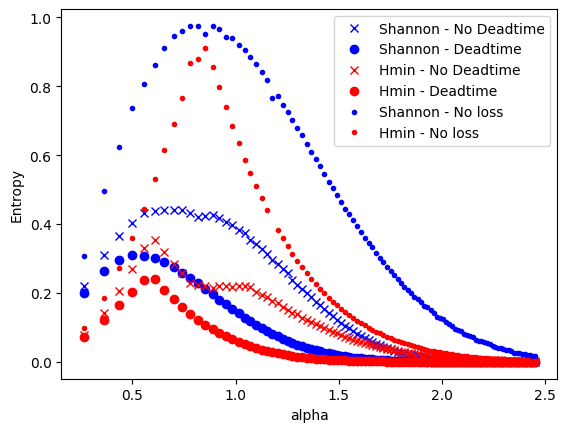

In [17]:
plt.figure()
plt.plot(alphas, res_1['vals'], 'bx', label="Shannon - No Deadtime")
plt.plot(alphas, res_2['vals'], 'bo', label="Shannon - Deadtime")
plt.plot(alphas, res_3['vals'], 'rx', label="Hmin - No Deadtime")
plt.plot(alphas, res_4['vals'], 'ro', label="Hmin - Deadtime")
plt.plot(alphas, res_5['vals'], 'b.', label="Shannon - No loss")
plt.plot(alphas, res_6['vals'], 'r.', label="Hmin - No loss")
plt.xlabel("alpha")
plt.ylabel("Entropy")
plt.legend()

## Comparing Shannon and EAT

In [ ]:
res1e = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, False)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 7/8)
    res1e['vals'].append(val)
    res1e['deltas'].append(delta)

with open('Results/ShannonEAT1_077_NoDT.json', 'w') as f:
    json.dump(res1e, f)

In [ ]:
res2e = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, True)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 7/8)
    res2e['vals'].append(val)
    res2e['deltas'].append(delta)

with open('Results/ShannonEAT1_077_DT.json', 'w') as f:
    json.dump(res2e, f)

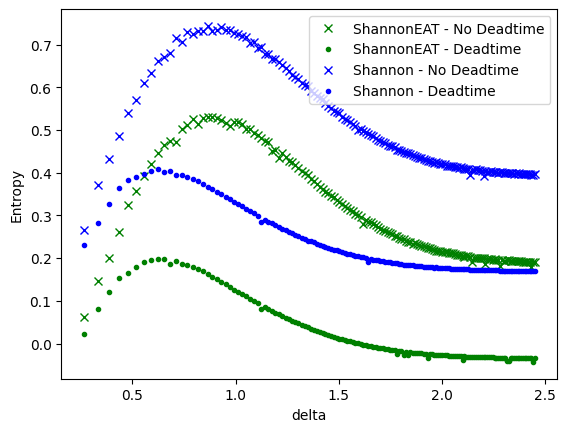

In [ ]:
plt.figure()
plt.plot(alphas, res1e['vals'], 'gx', label='ShannonEAT - No Deadtime')
plt.plot(alphas, res2e['vals'], 'g.', label='ShannonEAT - Deadtime')
plt.plot(alphas, res1['vals'], 'bx', label='Shannon - No Deadtime')
plt.plot(alphas, res2['vals'], 'b.', label='Shannon - Deadtime')
plt.xlabel('delta')
plt.ylabel('Entropy')
plt.legend()

In [ ]:
res1e_ = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, False)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 1/2)
    res1e_['vals'].append(val)
    res1e_['deltas'].append(delta)

with open('Results/ShannonEAT2_077_NoDT.json', 'w') as f:
    json.dump(res1e_, f)

KeyboardInterrupt: 

In [ ]:
res2e_ = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, True)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 1/2)
    res2e_['vals'].append(val)
    res2e_['deltas'].append(delta)

with open('Results/ShannonEAT2_077_DT.json', 'w') as f:
    json.dump(res2e_, f)

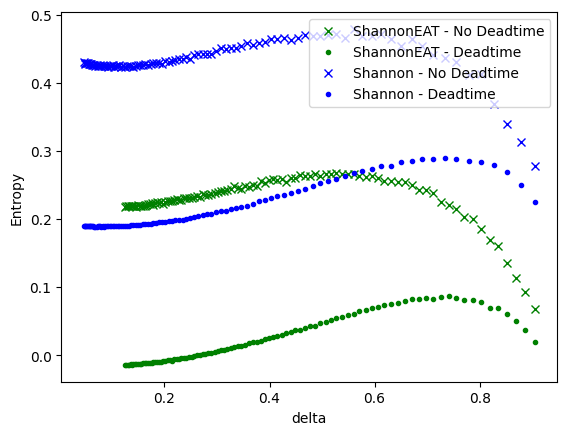

In [ ]:
plt.figure()
plt.plot(res1e_['deltas'], res1e_['vals'], 'gx', label='ShannonEAT - No Deadtime')
plt.plot(res2e_['deltas'], res2e_['vals'], 'g.', label='ShannonEAT - Deadtime')
plt.plot(res_1['deltas'], res_1['vals'], 'bx', label='Shannon - No Deadtime')
plt.plot(res_2['deltas'], res_2['vals'], 'b.', label='Shannon - Deadtime')
plt.xlabel('delta')
plt.ylabel('Entropy')
plt.legend()